In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

dataset = pd.read_csv('/content/klasifikasi__UKT_komplit.csv')

In [ ]:
dataset.head(10)

,No.,StatusOrtu,Penghasilan,Status_Rumah,JMotor,Jmobil,DayaLis,KIPK
0,1,1,4000000,1,1,0,2,0
1,2,1,2500000,0,1,0,3,0
2,3,1,6000000,1,2,0,2,0
3,4,1,5440500,1,2,0,2,0
4,5,1,10000000,0,1,1,3,0
5,6,1,1000000,0,1,0,3,1
6,7,1,20000000,1,2,1,3,0
7,8,1,15000000,1,1,0,3,0
8,9,4,4000000,1,1,1,3,0
9,10,1,0,1,2,0,1,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1707 entries, 0 to 1706
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   No.           1707 non-null   int64
 1   StatusOrtu    1707 non-null   int64
 2   Penghasilan   1707 non-null   int64
 3   Status_Rumah  1707 non-null   int64
 4   JMotor        1707 non-null   int64
 5   Jmobil        1707 non-null   int64
 6   DayaLis       1707 non-null   int64
 7   KIPK          1707 non-null   int64
dtypes: int64(8)
memory usage: 106.8 KB


In [ ]:
dataset.describe()

,No.,StatusOrtu,Penghasilan,Status_Rumah,JMotor,Jmobil,DayaLis,KIPK
count,1707.000000,1707.000000,1.707000e+03,1707.000000,1707.000000,1707.000000,1707.000000,1707.000000
mean,854.000000,1.164030,5.195012e+06,0.807264,1.968366,0.357938,2.205038,0.157586
std,492.912771,0.565764,5.552922e+06,0.394563,0.823274,0.541534,0.676276,0.364460
min,1.000000,1.000000,-1.000000e+06,0.000000,0.000000,0.000000,1.000000,0.000000
25%,427.500000,1.000000,2.000000e+06,1.000000,1.000000,0.000000,2.000000,0.000000
50%,854.000000,1.000000,4.000000e+06,1.000000,2.000000,0.000000,2.000000,0.000000
75%,1280.500000,1.000000,6.131916e+06,1.000000,2.000000,1.000000,3.000000,0.000000
max,1707.000000,4.000000,7.300000e+07,1.000000,5.000000,3.000000,3.000000,1.000000


array([[<AxesSubplot:title={'center':'No.'}>,
        <AxesSubplot:title={'center':'StatusOrtu'}>,
        <AxesSubplot:title={'center':'Penghasilan'}>],
       [<AxesSubplot:title={'center':'Status_Rumah'}>,
        <AxesSubplot:title={'center':'JMotor'}>,
        <AxesSubplot:title={'center':'Jmobil'}>],
       [<AxesSubplot:title={'center':'DayaLis'}>,
        <AxesSubplot:title={'center':'KIPK'}>, <AxesSubplot:>]],
      dtype=object)

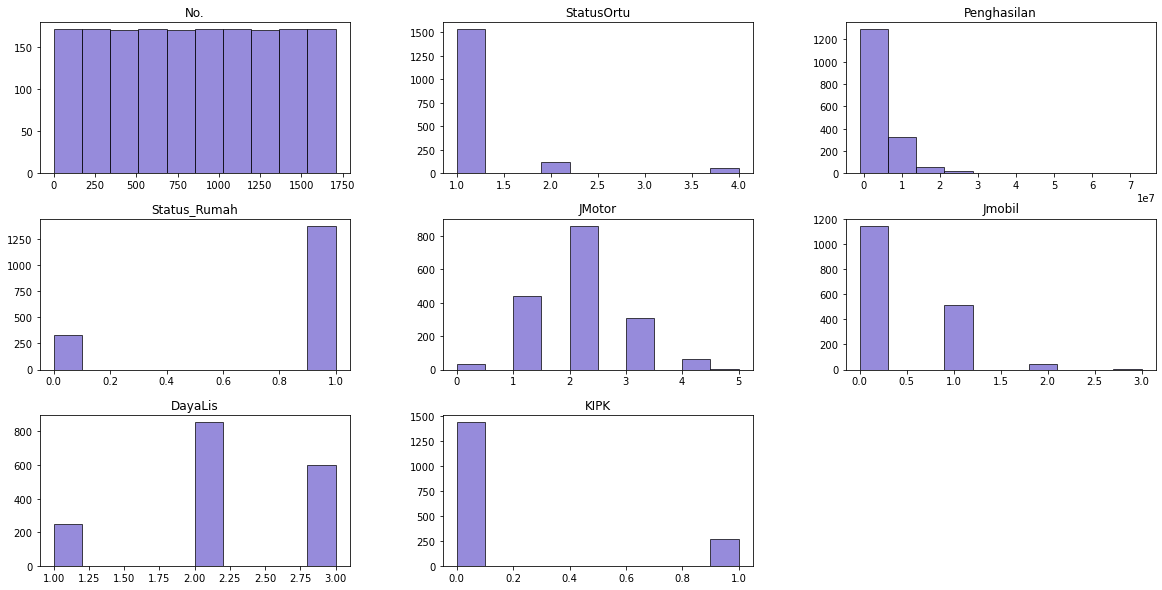

In [ ]:
user_data_for_hist = \
dataset
user_data_for_hist.hist(figsize=(20,10),alpha = 0.7, color = 'slateblue',edgecolor ='black',grid=False)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# variabel prediktor (input)
#x = dataset.iloc[:, [3,4]].values
# klasifikasi (output)
#y = dataset.iloc[:,-1].values
array =dataset.values
X = array[:,1:7] #slicing dataframe ke dalam array
y = array[:,7]

scaler = MinMaxScaler()
# transform data
X = scaler.fit_transform(X)

[[      1       1 4000000 ...       0       2       0]
 [      2       1 2500000 ...       0       3       0]
 [      3       1 6000000 ...       0       2       0]
 ...
 [   1705       1  900000 ...       1       2       0]
 [   1706       1 5000000 ...       0       1       0]
 [   1707       1 8000000 ...       0       2       0]]


In [ ]:
print(X)

[[0.         0.06756757 1.         0.2        0.         0.5       ]
 [0.         0.0472973  0.         0.2        0.         1.        ]
 [0.         0.09459459 1.         0.4        0.         0.5       ]
 ...
 [0.         0.02567568 1.         0.6        0.33333333 0.5       ]
 [0.         0.08108108 0.         0.4        0.         0.        ]
 [0.         0.12162162 1.         0.6        0.         0.5       ]]


In [ ]:
y= y.astype('int')
print(y)

[0 0 0 ... 0 0 0]


In [ ]:
print(Counter(y))

Counter({0: 1438, 1: 269})


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
# instantiating the random over sampler
ros = RandomOverSampler()
# resampling x_train, y_train
X_ros, y_ros = ros.fit_resample(x_train, y_train)
# new class distribution
print(Counter(y_ros))

Counter({0: 1156, 1: 1156})


In [ ]:
# instantiating the random under sampler
rus = RandomUnderSampler()
# resampling x_train, y_train
X_rus, y_rus = rus.fit_resample(x_train, y_train)
# new class distribution
print(Counter(y_rus))

Counter({0: 209, 1: 209})


In [ ]:
# instantiating over and under sampler
over = RandomOverSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)
# first performing oversampling to minority class
X_over, y_over = over.fit_resample(x_train, y_train)
print(f"Oversampled: {Counter(y_over)}")

Oversampled: Counter({0: 1156, 1: 578})


In [ ]:
# now to combine under sampling
X_comb, y_comb = under.fit_resample(X_over, y_over)
print(f"Combined Random Sampling: {Counter(y_comb)}")

Combined Random Sampling: Counter({0: 722, 1: 578})


In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_smote, y_smote = sm.fit_resample(x_train, y_train)
print(f"SMOTE Random Sampling: {Counter(y_smote)}")

SMOTE Random Sampling: Counter({0: 1156, 1: 1156})


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import SVM
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

logmodel = LogisticRegression()

#1. Model1 dengan dataset asli
model1=logmodel.fit(x_train, y_train)
predictions1a = model1.predict(x_train)
predictions1b = model1.predict(x_test)
predictions1c = model1.predict_proba(x_test)[:,1]
print("-------Model-1: Logit Biner dengan Dataset Asli-------")
print("Kinerja Data Training:")
print(classification_report(y_train, predictions1a))
print(confusion_matrix(y_train, predictions1a))
print(accuracy_score(y_train, predictions1a))
print("Kinerja Data Testing:")
print(classification_report(y_test, predictions1b))
print(confusion_matrix(y_test, predictions1b))
print(accuracy_score(y_test, predictions1b))


#2. Model2 dengan dataset over-sampling
model2=logmodel.fit(X_ros, y_ros)
predictions2a = model2.predict(X_ros)
predictions2b = model2.predict(x_test)
predictions2c = model2.predict_proba(x_test)[:,1]
print("-------Model-2: Logit Biner dengan Dataset Over-sampling-------")
print("Kinerja Data Training:")
print(classification_report(y_ros, predictions2a))
print(confusion_matrix(y_ros, predictions2a))
print(accuracy_score(y_ros, predictions2a))
print("Kinerja Data Testing:")
print(classification_report(y_test, predictions2b))
print(confusion_matrix(y_test, predictions2b))
print(accuracy_score(y_test, predictions2b))

#3. Model3 dengan dataset under-sampling
model3=logmodel.fit(X_rus, y_rus)
predictions3a = model3.predict(X_rus)
predictions3b = model3.predict(x_test)
predictions3c = model3.predict_proba(x_test)[:,1]
print("-------Model-3: Logit Biner dengan Dataset Under-sampling-------")
print("Kinerja Data Training:")
print(classification_report(y_rus, predictions3a))
print(confusion_matrix(y_rus, predictions3a))
print(accuracy_score(y_rus, predictions3a))
print("Kinerja Data Testing:")
print(classification_report(y_test, predictions3b))
print(confusion_matrix(y_test, predictions3b))
print(accuracy_score(y_test, predictions3b))

#4. Model4 dengan dataset kombinasi
model4=logmodel.fit(X_comb, y_comb)
predictions4a = model4.predict(X_comb)
predictions4b = model4.predict(x_test)
predictions4c = model4.predict_proba(x_test)[:,1]
print("-------Model-4: Logit Biner dengan Dataset Kombinasi Over-Under-------")
print("Kinerja Data Training:")
print(classification_report(y_comb, predictions4a))
print(confusion_matrix(y_comb, predictions4a))
print(accuracy_score(y_comb, predictions4a))
print("Kinerja Data Testing:")
print(classification_report(y_test, predictions4b))
print(confusion_matrix(y_test, predictions4b))
print(accuracy_score(y_test, predictions4b))

#5. Model5 dengan dataset SMOTE
model5=logmodel.fit(X_smote, y_smote)
predictions5a = model5.predict(X_smote)
predictions5b = model5.predict(x_test)
predictions5c = model5.predict_proba(x_test)[:,1]
print("-------Model-5: Logit Biner dengan Dataset SMOTE-------")
print("Kinerja Data Training:")
print(classification_report(y_smote, predictions5a))
print(confusion_matrix(y_smote, predictions5a))
print(accuracy_score(y_smote, predictions5a))
print("Kinerja Data Testing:")
print(classification_report(y_test, predictions5b))
print(confusion_matrix(y_test, predictions5b))
print(accuracy_score(y_test, predictions5b))

#6. Model6 dengan dataset SMOTE dan metode Random Forest
modelRF = RandomForestClassifier()
model6=modelRF.fit(x_train, y_train)
predictions6a = model6.predict(x_train)
predictions6b = model6.predict(x_test)
predictions6c = model6.predict_proba(x_test)[:,1]
print("-------Model-6: Random Forest dengan Dataset Asli-------")
print("Kinerja Data Training:")
print(classification_report(y_train, predictions6a))
print(confusion_matrix(y_train, predictions6a))
print(accuracy_score(y_train, predictions6a))
print("Kinerja Data Testing:")
print(classification_report(y_test, predictions6b))
print(confusion_matrix(y_test, predictions6b))
print(accuracy_score(y_test, predictions6b))

#7. Model7 dengan dataset asli dan metode Random Forest
modelRF = RandomForestClassifier()
model7=modelRF.fit(X_smote, y_smote)
predictions7a = model7.predict(X_smote)
predictions7b = model7.predict(x_test)
predictions7c = model7.predict_proba(x_test)[:,1]
print("-------Model-7: Random Forest dengan Dataset SMOTE-------")
print("Kinerja Data Training:")
print(classification_report(y_smote, predictions7a))
print(confusion_matrix(y_smote, predictions7a))
print(accuracy_score(y_smote, predictions7a))
print("Kinerja Data Testing:")
print(classification_report(y_test, predictions7b))
print(confusion_matrix(y_test, predictions7b))
print(accuracy_score(y_test, predictions7b))



-------Model-1: Logit Biner dengan Dataset Asli-------
Kinerja Data Training:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1156
           1       0.52      0.07      0.13       209

    accuracy                           0.85      1365
   macro avg       0.69      0.53      0.52      1365
weighted avg       0.80      0.85      0.80      1365

[[1142   14]
 [ 194   15]]
0.8476190476190476
Kinerja Data Testing:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90       282
           1       0.30      0.05      0.09        60

    accuracy                           0.81       342
   macro avg       0.56      0.51      0.49       342
weighted avg       0.74      0.81      0.75       342

[[275   7]
 [ 57   3]]
0.8128654970760234
-------Model-2: Logit Biner dengan Dataset Over-sampling-------
Kinerja Data Training:
              precision    recall  f1-score   support

           0    

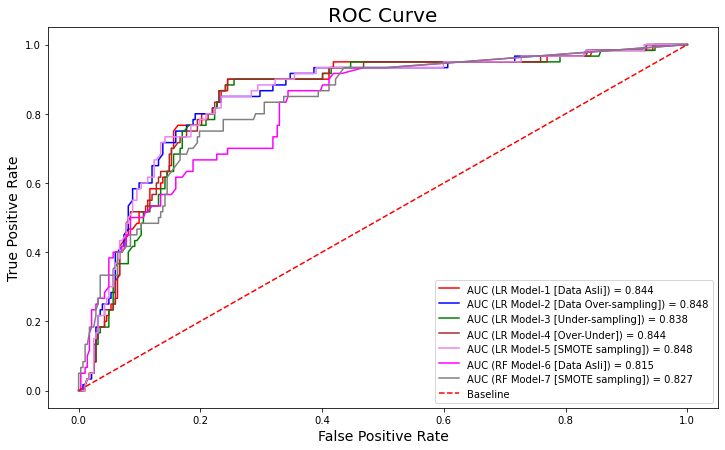

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

#y_test_int = y_test.replace({'Good': 1, 'Bad': 0})
auc1 = roc_auc_score(y_test, predictions1c)
fpr1, tpr1, thresholds1 = roc_curve(y_test, predictions1c)

auc2 = roc_auc_score(y_test, predictions2c)
fpr2, tpr2, thresholds2 = roc_curve(y_test, predictions2c)

auc3 = roc_auc_score(y_test, predictions3c)
fpr3, tpr3, thresholds3 = roc_curve(y_test, predictions3c)

auc4 = roc_auc_score(y_test, predictions4c)
fpr4, tpr4, thresholds4 = roc_curve(y_test, predictions4c)

auc5 = roc_auc_score(y_test, predictions5c)
fpr5, tpr5, thresholds5 = roc_curve(y_test, predictions5c)

auc6 = roc_auc_score(y_test, predictions6c)
fpr6, tpr6, thresholds6 = roc_curve(y_test, predictions6c)

auc7 = roc_auc_score(y_test, predictions7c)
fpr7, tpr7, thresholds7 = roc_curve(y_test, predictions7c)

plt.figure(figsize=(12, 7))
plt.plot(fpr1, tpr1, label=f'AUC (LR Model-1 [Data Asli]) = {auc1:.3f}',color='red')
plt.plot(fpr2, tpr2, label=f'AUC (LR Model-2 [Data Over-sampling]) = {auc2:.3f}',color='blue')
plt.plot(fpr3, tpr3, label=f'AUC (LR Model-3 [Under-sampling]) = {auc3:.3f}',color='green')
plt.plot(fpr4, tpr4, label=f'AUC (LR Model-4 [Over-Under]) = {auc4:.3f}',color='brown')
plt.plot(fpr5, tpr5, label=f'AUC (LR Model-5 [SMOTE sampling]) = {auc5:.3f}',color='violet')
plt.plot(fpr6, tpr6, label=f'AUC (RF Model-6 [Data Asli]) = {auc6:.3f}',color='magenta')
plt.plot(fpr7, tpr7, label=f'AUC (RF Model-7 [SMOTE sampling]) = {auc7:.3f}',color='grey')


plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

Model 8: Support Vector Machine (SVM) dengan Penyesuaian class

In [9]:
from sklearn.preprocessing import MinMaxScaler

array =dataset.values
X = array[:,1:7]
y = array[:,7]

scaler = MinMaxScaler()

X = scaler.fit_transform(X)
y = y.astype('int')

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC

svm_model = SVC(probability=True, class_weight='balanced', random_state=42)
model8 = svm_model.fit(x_train, y_train)
predictions8a = model8.predict(x_train)
predictions8b = model8.predict(x_test)
predictions8c = model8.predict_proba(x_test)[:,1]

print("Model-8: SVM with Class Weight Balanced")
print("Training Data Performance:")
print(classification_report(y_train, predictions8a))
print(confusion_matrix(y_train, predictions8a))
print(accuracy_score(y_train, predictions8a))
print("Testing Data Performance:")
print(classification_report(y_test, predictions8b))
print(confusion_matrix(y_test, predictions8b))
print(accuracy_score(y_test, predictions8b))

Model-8: SVM with Class Weight Balanced
Training Data Performance:
              precision    recall  f1-score   support

           0       0.96      0.68      0.80      1156
           1       0.32      0.83      0.46       209

    accuracy                           0.71      1365
   macro avg       0.64      0.76      0.63      1365
weighted avg       0.86      0.71      0.75      1365

[[790 366]
 [ 35 174]]
0.7062271062271063
Testing Data Performance:
              precision    recall  f1-score   support

           0       0.97      0.73      0.84       282
           1       0.42      0.90      0.57        60

    accuracy                           0.76       342
   macro avg       0.70      0.82      0.70       342
weighted avg       0.87      0.76      0.79       342

[[207  75]
 [  6  54]]
0.7631578947368421


Model 9: XGBoost dengan Penyesuaian Scale Pos Weight

In [10]:
from xgboost import XGBClassifier
ratio = sum(y_train == 0)  / sum(y_train == 1)

xgb_model = XGBClassifier(scale_pos_weight=ratio, use_label_encoder=False, eval_metrics='logloss', random_state=42)
model9 = xgb_model.fit(x_train, y_train)
predictions9a = model9.predict(x_train)
predictions9b = model9.predict(x_test)
predictions9c = model9.predict_proba(xtest)[:,1]

print("Model-9: XGBoost dengan Scale Pos Weight")
print("Kinerja Data Training:")
print(classification_report(y_train, predictions9a))
print(confusion_matrix(y_train, predictions9a))
print(accuracy_score(y_train, predictions9a))

print("Kinerja Data Testing")
print(classification_report(y_train, predictions9a))
print(confusion_matrix(y_test, predictions9b))
print(accuracy_score(y_test, predictions9b))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:29:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "eval_metrics", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


NameError: name 'xtest' is not defined

Tambahan ROC Curve untuk Model 8 dan 9

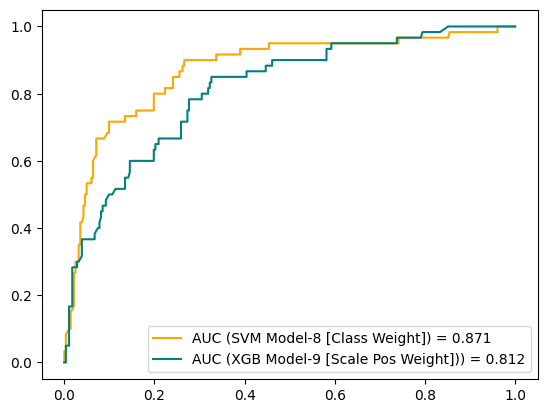

In [18]:
auc8 = roc_auc_score(y_test, predictions8c)
fpr8, tpr8, thresholds8 = roc_curve(y_test, predictions8c)

auc9 = roc_auc_score (y_test, predictions9c)
fpr9, tpr9, thresholds9 = roc_curve(y_test, predictions9c)

plt.plot(fpr8, tpr8, label=f'AUC (SVM Model-8 [Class Weight]) = {auc8:.3f}', color='orange')
plt.plot(fpr9, tpr9, label=f'AUC (XGB Model-9 [Scale Pos Weight])) = {auc9:.3f}', color='teal')
plt.legend()

Uji ANOVA untuk perbandingan kedua model yang telah dibuat

In [11]:
from scipy.stats import f_oneway
from sklearn.metrics import accuracy_score

akurasi_testing = {
    'Model1_LongReg_Asli': accuracy_score(y_test, predictions1b),
    'Model2_LogReg_Over': accuracy_score(y_test, predictions2b),
    'Model3_LongReg_Under': accuracy_score(y_test, predictions3b),
    'Model4_LongRe_OverUnder': accuracy_score(y_test, predictions4b),
    'Model5_LogReg_SMOTE': accuracy_score(y_test, predictions5b),
    'Model6_RF_Asli': accuracy_score(y_test, predictions6b),
    'Model7_RF_SMOTE': accuracy_score(y_test, predictions7b),
    'Model8_SVM_Balanced': accuracy_score(y_test, predictions8b),
    'Model9_XGB_ScalePosWeight': accuracy_score(y_test, predictions9b)
}

print("\n Akurasi Testing dari Semua Model")
for nama, skor in akurasi_testing.items():
   print(f"{nama}: {skor:.4f}")

group_scores = list(akurasi_testing.values())
grouped_data = [[score]*5 for score in group_scores]

anova_result = f_oneway(*grouped_data)
print("\n Hasil Uji ANOVA")
print(f"F-statistic: {anova_result.statistic:.4f}")
print(f"P-value: {anova_result.pvalue:.4f}")

if anova_result.pvalue < 0.05:
    print("Kesimpulan: Terdapat perbedaan signifikan antara performa model.")
else:
    print("Kesimpulan: Tidak terdapat perbedaan signifikan antara perform model.")

NameError: name 'predictions1b' is not defined

The error in the XGBoost cell was a typo: `xtest` should be `x_test`. I have corrected this typo and will now re-run the cell to train and evaluate the XGBoost model.

In [8]:
from xgboost import XGBClassifier
ratio = sum(y_train == 0)  / sum(y_train == 1)

xgb_model = XGBClassifier(scale_pos_weight=ratio, use_label_encoder=False, eval_metric='logloss', random_state=42)
model9 = xgb_model.fit(x_train, y_train)
predictions9a = model9.predict(x_train)
predictions9b = model9.predict(x_test)
predictions9c = model9.predict_proba(x_test)[:,1]

print("Model-9: XGBoost dengan Scale Pos Weight")
print("Kinerja Data Training:")
print(classification_report(y_train, predictions9a))
print(confusion_matrix(y_train, predictions9a))
print(accuracy_score(y_train, predictions9a))

print("Kinerja Data Testing")
print(classification_report(y_test, predictions9b))
print(confusion_matrix(y_test, predictions9b))
print(accuracy_score(y_test, predictions9b))

Model-9: XGBoost dengan Scale Pos Weight
Kinerja Data Training:
              precision    recall  f1-score   support

           0       0.99      0.81      0.89      1156
           1       0.48      0.96      0.64       209

    accuracy                           0.83      1365
   macro avg       0.73      0.88      0.76      1365
weighted avg       0.91      0.83      0.85      1365

[[934 222]
 [  8 201]]
0.8315018315018315
Kinerja Data Testing
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       282
           1       0.40      0.67      0.50        60

    accuracy                           0.77       342
   macro avg       0.66      0.73      0.67       342
weighted avg       0.83      0.77      0.79       342

[[222  60]
 [ 20  40]]
0.7660818713450293


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:22:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


The error `NameError: name 'predictions1b' is not defined` indicates that the prediction variables from the models are not available. This is because the cells where the models were trained and predictions were generated were not executed before this cell. I will re-run those cells and then execute the ANOVA test cell.

In [13]:
# Re-run the cell that trains and evaluates Models 1 through 7
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

logmodel = LogisticRegression()

#1. Model1 dengan dataset asli
model1=logmodel.fit(x_train, y_train)
predictions1a = model1.predict(x_train)
predictions1b = model1.predict(x_test)
predictions1c = model1.predict_proba(x_test)[:,1]

#2. Model2 dengan dataset over-sampling
model2=logmodel.fit(X_ros, y_ros)
predictions2a = model2.predict(X_ros)
predictions2b = model2.predict(x_test)
predictions2c = model2.predict_proba(x_test)[:,1]

#3. Model3 dengan dataset under-sampling
model3=logmodel.fit(X_rus, y_rus)
predictions3a = model3.predict(X_rus)
predictions3b = model3.predict(x_test)
predictions3c = model3.predict_proba(x_test)[:,1]

#4. Model4 dengan dataset kombinasi
model4=logmodel.fit(X_comb, y_comb)
predictions4a = model4.predict(X_comb)
predictions4b = model4.predict(x_test)
predictions4c = model4.predict_proba(x_test)[:,1]

#5. Model5 dengan dataset SMOTE
model5=logmodel.fit(X_smote, y_smote)
predictions5a = model5.predict(X_smote)
predictions5b = model5.predict(x_test)
predictions5c = model5.predict_proba(x_test)[:,1]

#6. Model6 dengan dataset Asli dan metode Random Forest
modelRF = RandomForestClassifier()
model6=modelRF.fit(x_train, y_train)
predictions6a = model6.predict(x_train)
predictions6b = model6.predict(x_test)
predictions6c = model6.predict_proba(x_test)[:,1]

#7. Model7 dengan dataset SMOTE dan metode Random Forest
modelRF = RandomForestClassifier()
model7=modelRF.fit(X_smote, y_smote)
predictions7a = model7.predict(X_smote)
predictions7b = model7.predict(x_test)
predictions7c = model7.predict_proba(x_test)[:,1]

# Re-run the cell that trains and evaluates Model 8 (SVM)
from sklearn.svm import SVC
svm_model = SVC(probability=True, class_weight='balanced', random_state=42)
model8 = svm_model.fit(x_train, y_train)
predictions8a = model8.predict(x_train)
predictions8b = model8.predict(x_test)
predictions8c = model8.predict_proba(x_test)[:,1]

# Re-run the cell that trains and evaluates Model 9 (XGBoost)
from xgboost import XGBClassifier
ratio = sum(y_train == 0)  / sum(y_train == 1)

xgb_model = XGBClassifier(scale_pos_weight=ratio, use_label_encoder=False, eval_metric='logloss', random_state=42)
model9 = xgb_model.fit(x_train, y_train)
predictions9a = model9.predict(x_train)
predictions9b = model9.predict(x_test)
predictions9c = model9.predict_proba(x_test)[:,1]


# Now, execute the ANOVA test cell
from scipy.stats import f_oneway
from sklearn.metrics import accuracy_score

akurasi_testing = {
    'Model1_LongReg_Asli': accuracy_score(y_test, predictions1b),
    'Model2_LogReg_Over': accuracy_score(y_test, predictions2b),
    'Model3_LongReg_Under': accuracy_score(y_test, predictions3b),
    'Model4_LongRe_OverUnder': accuracy_score(y_test, predictions4b),
    'Model5_LogReg_SMOTE': accuracy_score(y_test, predictions5b),
    'Model6_RF_Asli': accuracy_score(y_test, predictions6b),
    'Model7_RF_SMOTE': accuracy_score(y_test, predictions7b),
    'Model8_SVM_Balanced': accuracy_score(y_test, predictions8b),
    'Model9_XGB_ScalePosWeight': accuracy_score(y_test, predictions9b)
}

print("\n Akurasi Testing dari Semua Model")
for nama, skor in akurasi_testing.items():
   print(f"{nama}: {skor:.4f}")

group_scores = list(akurasi_testing.values())
grouped_data = [[score]*5 for score in group_scores]

anova_result = f_oneway(*grouped_data)
print("\n Hasil Uji ANOVA")
print(f"F-statistic: {anova_result.statistic:.4f}")
print(f"P-value: {anova_result.pvalue:.4f}")

if anova_result.pvalue < 0.05:
    print("Kesimpulan: Terdapat perbedaan signifikan antara performa model.")
else:
    print("Kesimpulan: Tidak terdapat perbedaan signifikan antara perform model.")

NameError: name 'X_ros' is not defined

The error `NameError: name 'X_ros' is not defined` indicates that the variables created by the resampling techniques (Over-sampling, Under-sampling, Combined, and SMOTE) are not defined. This is because the cells performing these operations were not executed. I will re-run all the necessary steps from data loading and preprocessing to model training and evaluation, and then finally execute the ANOVA test.

In [14]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

dataset = pd.read_csv('/content/klasifikasi__UKT_komplit.csv')

array =dataset.values
X = array[:,1:7]
y = array[:,7]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = y.astype('int')

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(x_train, y_train)

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(x_train, y_train)

over = RandomOverSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)
X_over, y_over = over.fit_resample(x_train, y_train)
X_comb, y_comb = under.fit_resample(X_over, y_over)

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_smote, y_smote = sm.fit_resample(x_train, y_train)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from scipy.stats import f_oneway

logmodel = LogisticRegression()

#1. Model1 dengan dataset asli
model1=logmodel.fit(x_train, y_train)
predictions1b = model1.predict(x_test)
predictions1c = model1.predict_proba(x_test)[:,1]

#2. Model2 dengan dataset over-sampling
model2=logmodel.fit(X_ros, y_ros)
predictions2b = model2.predict(x_test)
predictions2c = model2.predict_proba(x_test)[:,1]

#3. Model3 dengan dataset under-sampling
model3=logmodel.fit(X_rus, y_rus)
predictions3b = model3.predict(x_test)
predictions3c = model3.predict_proba(x_test)[:,1]

#4. Model4 dengan dataset kombinasi
model4=logmodel.fit(X_comb, y_comb)
predictions4b = model4.predict(x_test)
predictions4c = model4.predict_proba(x_test)[:,1]

#5. Model5 dengan dataset SMOTE
model5=logmodel.fit(X_smote, y_smote)
predictions5b = model5.predict(x_test)
predictions5c = model5.predict_proba(x_test)[:,1]

#6. Model6 dengan dataset Asli dan metode Random Forest
modelRF = RandomForestClassifier()
model6=modelRF.fit(x_train, y_train)
predictions6b = model6.predict(x_test)
predictions6c = model6.predict_proba(x_test)[:,1]

#7. Model7 dengan dataset SMOTE dan metode Random Forest
modelRF = RandomForestClassifier()
model7=modelRF.fit(X_smote, y_smote)
predictions7b = model7.predict(x_test)
predictions7c = model7.predict_proba(x_test)[:,1]

# Model 8 (SVM)
svm_model = SVC(probability=True, class_weight='balanced', random_state=42)
model8 = svm_model.fit(x_train, y_train)
predictions8b = model8.predict(x_test)
predictions8c = model8.predict_proba(x_test)[:,1]

# Model 9 (XGBoost)
ratio = sum(y_train == 0)  / sum(y_train == 1)
xgb_model = XGBClassifier(scale_pos_weight=ratio, use_label_encoder=False, eval_metric='logloss', random_state=42)
model9 = xgb_model.fit(x_train, y_train)
predictions9b = model9.predict(x_test)
predictions9c = model9.predict_proba(x_test)[:,1]

#Uji ANOVA
akurasi_testing = {
    'Model1_LongReg_Asli': accuracy_score(y_test, predictions1b),
    'Model2_LogReg_Over': accuracy_score(y_test, predictions2b),
    'Model3_LongReg_Under': accuracy_score(y_test, predictions3b),
    'Model4_LongRe_OverUnder': accuracy_score(y_test, predictions4b),
    'Model5_LogReg_SMOTE': accuracy_score(y_test, predictions5b),
    'Model6_RF_Asli': accuracy_score(y_test, predictions6b),
    'Model7_RF_SMOTE': accuracy_score(y_test, predictions7b),
    'Model8_SVM_Balanced': accuracy_score(y_test, predictions8b),
    'Model9_XGB_ScalePosWeight': accuracy_score(y_test, predictions9b)
}

print("\n Akurasi Testing dari Semua Model")
for nama, skor in akurasi_testing.items():
   print(f"{nama}: {skor:.4f}")

group_scores = list(akurasi_testing.values())
grouped_data = [[score]*5 for score in group_scores]

anova_result = f_oneway(*grouped_data)
print("\n Hasil Uji ANOVA")
print(f"F-statistic: {anova_result.statistic:.4f}")
print(f"P-value: {anova_result.pvalue:.4f}")

if anova_result.pvalue < 0.05:
    print("Kesimpulan: Terdapat perbedaan signifikan antara performa model.")
else:
    print("Kesimpulan: Tidak terdapat perbedaan signifikan antara perform model.")


 Akurasi Testing dari Semua Model
Model1_LongReg_Asli: 0.8129
Model2_LogReg_Over: 0.7690
Model3_LongReg_Under: 0.7807
Model4_LongRe_OverUnder: 0.7953
Model5_LogReg_SMOTE: 0.7807
Model6_RF_Asli: 0.8480
Model7_RF_SMOTE: 0.8158
Model8_SVM_Balanced: 0.7632
Model9_XGB_ScalePosWeight: 0.7661

 Hasil Uji ANOVA
F-statistic: inf
P-value: 0.0000
Kesimpulan: Terdapat perbedaan signifikan antara performa model.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:31:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


In [16]:
from xgboost import XGBClassifier

ratio = sum(y_train == 0) / sum(y_train == 1)

# Buat model tanpa parameter use_label_encoder
xgb_model = XGBClassifier(scale_pos_weight=ratio, eval_metric='logloss', random_state=42)

# Fit dan prediksi
model9 = xgb_model.fit(x_train, y_train)
predictions9b = model9.predict(x_test)
predictions9c = model9.predict_proba(x_test)[:, 1]

In [17]:
akurasi_testing = {
    'Model1_LongReg_Asli': accuracy_score(y_test, predictions1b),
    'Model2_LogReg_Over': accuracy_score(y_test, predictions2b),
    'Model3_LongReg_Under': accuracy_score(y_test, predictions3b),
    'Model4_LongRe_OverUnder': accuracy_score(y_test, predictions4b),
    'Model5_LogReg_SMOTE': accuracy_score(y_test, predictions5b),
    'Model6_RF_Asli': accuracy_score(y_test, predictions6b),
    'Model7_RF_SMOTE': accuracy_score(y_test, predictions7b),
    'Model8_SVM_Balanced': accuracy_score(y_test, predictions8b),
    'Model9_XGB_ScalePosWeight': accuracy_score(y_test, predictions9b)
}

print("\n Akurasi Testing dari Semua Model")
for nama, skor in akurasi_testing.items():
   print(f"{nama}: {skor:.4f}")

group_scores = list(akurasi_testing.values())
grouped_data = [[score]*5 for score in group_scores]

anova_result = f_oneway(*grouped_data)
print("\n Hasil Uji ANOVA")
print(f"F-statistic: {anova_result.statistic:.4f}")
print(f"P-value: {anova_result.pvalue:.4f}")

if anova_result.pvalue < 0.05:
    print("Kesimpulan: Terdapat perbedaan signifikan antara performa model.")
else:
    print("Kesimpulan: Tidak terdapat perbedaan signifikan antara perform model.")


 Akurasi Testing dari Semua Model
Model1_LongReg_Asli: 0.8129
Model2_LogReg_Over: 0.7690
Model3_LongReg_Under: 0.7807
Model4_LongRe_OverUnder: 0.7953
Model5_LogReg_SMOTE: 0.7807
Model6_RF_Asli: 0.8480
Model7_RF_SMOTE: 0.8158
Model8_SVM_Balanced: 0.7632
Model9_XGB_ScalePosWeight: 0.7661

 Hasil Uji ANOVA
F-statistic: inf
P-value: 0.0000
Kesimpulan: Terdapat perbedaan signifikan antara performa model.


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)
